In [2]:
# Imports
import cv2
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras import layers, initializers, models

In [3]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

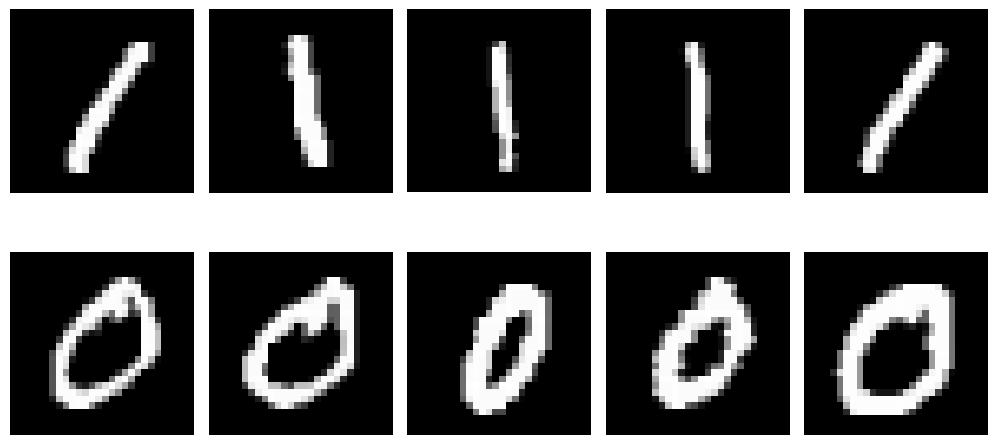

In [4]:
indices = np.where(y_train == 1)[0][:5]
ones = x_train[indices]
indices0 = np.where(y_train == 0)[0][:5]
zeros = x_train[indices0]

# Plot images
plt.figure(figsize=(20, 5))
for i, image in enumerate(ones):
    plt.subplot(2, 10, i+1)
    plt.imshow(image, cmap='gray')
    plt.axis('off')
for i, image in enumerate(zeros):
    plt.subplot(2, 10, 10+i+1)
    plt.imshow(image, cmap='gray')
    plt.axis('off')
plt.tight_layout()
plt.show()

c:\Users\nandi\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


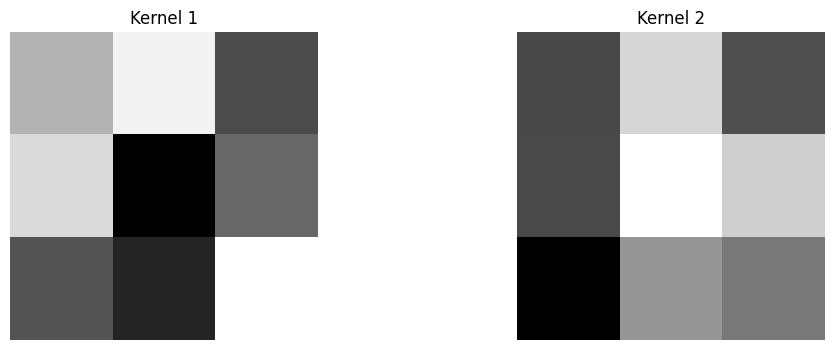

In [5]:
model = models.Sequential()
model.add(layers.Conv2D(2, (3, 3), activation=None, input_shape=(28, 28, 1), kernel_initializer=initializers.RandomNormal()))

# Retrieve the initialized kernels
kernels = model.layers[0].get_weights()[0]

# Plot the kernels
fig, axs = plt.subplots(1, kernels.shape[-1], figsize=(12, 4))
for i in range(kernels.shape[-1]):
    ax = axs[i]
    ax.imshow(kernels[:, :, 0, i], cmap='gray', interpolation='none')
    ax.set_title(f'Kernel {i + 1}')
    ax.axis('off')

plt.show()

In [6]:
# kernels.shape
# # 3x3 size, 1 input channel, 1 kernels

# kernel1 = kernels[:, :, 0, 0]  
# kernel2 = kernels[:, :, 0, 1]

kernel1=[[ 0.02769659 ,-0.06262548 ,-0.00112099], [ 0.07661597 ,-0.01977107 ,-0.05762664], [ 0.08157734 , 0.08840936, -0.11951234]]
(kernel2)=[[-0.04038552, -0.01211381 , 0.02353951], [-0.01316861  ,0.02338838  ,0.03887926], [ 0.0192501   ,0.05198102  ,0.00690457]]


In [7]:
def convolve(image, kernel):
    # Get the dimensions of the image and the kernel
    image_height, image_width = len(image), len(image[0])
    kernel_height, kernel_width = len(kernel), len(kernel[0])
    
    #print("Image dimensions (height, width) => ", image_height, image_width)
    #print("Kernel dimensions (height, width) => ", kernel_height, kernel_width)
    
    # Calculate the output dimensions
    output_height = image_height - kernel_height + 1
    output_width = image_width - kernel_width + 1
    
    print("Output dimensions (height, width) => ", output_height, output_width)
    
    # Initialize the output image with zeros
    output = [[0 for _ in range(output_width)] for _ in range(output_height)]
    
    # plt.figure(1)
    # plt.imshow(output, cmap='gray')
    # plt.title('Initial Output Image')
    # plt.show()
    
    # Perform the convolution
    
    for i in range(output_height):
        
        for j in range(output_width):
            
            sum_value = 0
            for m in range(kernel_height):
                
                for n in range(kernel_width):
                    
                    sum_value += image[i + m][j + n] * kernel[m][n]
                    
            output[i][j] = sum_value
            #print("  Updated output at position (i, j) => ", output[i][j])
            
            # # Plot the current output after each update
            # plt.figure(fig_num)
            # plt.imshow(output, cmap='gray')
            # plt.title(f'Convolution Step: i={i}, j={j}')
            # plt.show()
            # fig_num += 1
            
    # print("Final output image after convolution:")
    # for row in output:
    #     print(row)
    
    return output


In [8]:
# Convolve the images with the kernels
conv_results = {'ones': [], 'zeros': []}
for image in ones:
    conv1 = convolve(image, kernel1)
    conv2 = convolve(image, kernel2)
    conv_results['ones'].append((conv1, conv2))

for image in zeros:
    conv1 = convolve(image, kernel1)
    conv2 = convolve(image, kernel2)
    conv_results['zeros'].append((conv1, conv2))



Output dimensions (height, width) =>  26 26
Output dimensions (height, width) =>  26 26
Output dimensions (height, width) =>  26 26
Output dimensions (height, width) =>  26 26
Output dimensions (height, width) =>  26 26
Output dimensions (height, width) =>  26 26
Output dimensions (height, width) =>  26 26
Output dimensions (height, width) =>  26 26
Output dimensions (height, width) =>  26 26
Output dimensions (height, width) =>  26 26
Output dimensions (height, width) =>  26 26
Output dimensions (height, width) =>  26 26
Output dimensions (height, width) =>  26 26
Output dimensions (height, width) =>  26 26
Output dimensions (height, width) =>  26 26
Output dimensions (height, width) =>  26 26
Output dimensions (height, width) =>  26 26
Output dimensions (height, width) =>  26 26
Output dimensions (height, width) =>  26 26
Output dimensions (height, width) =>  26 26


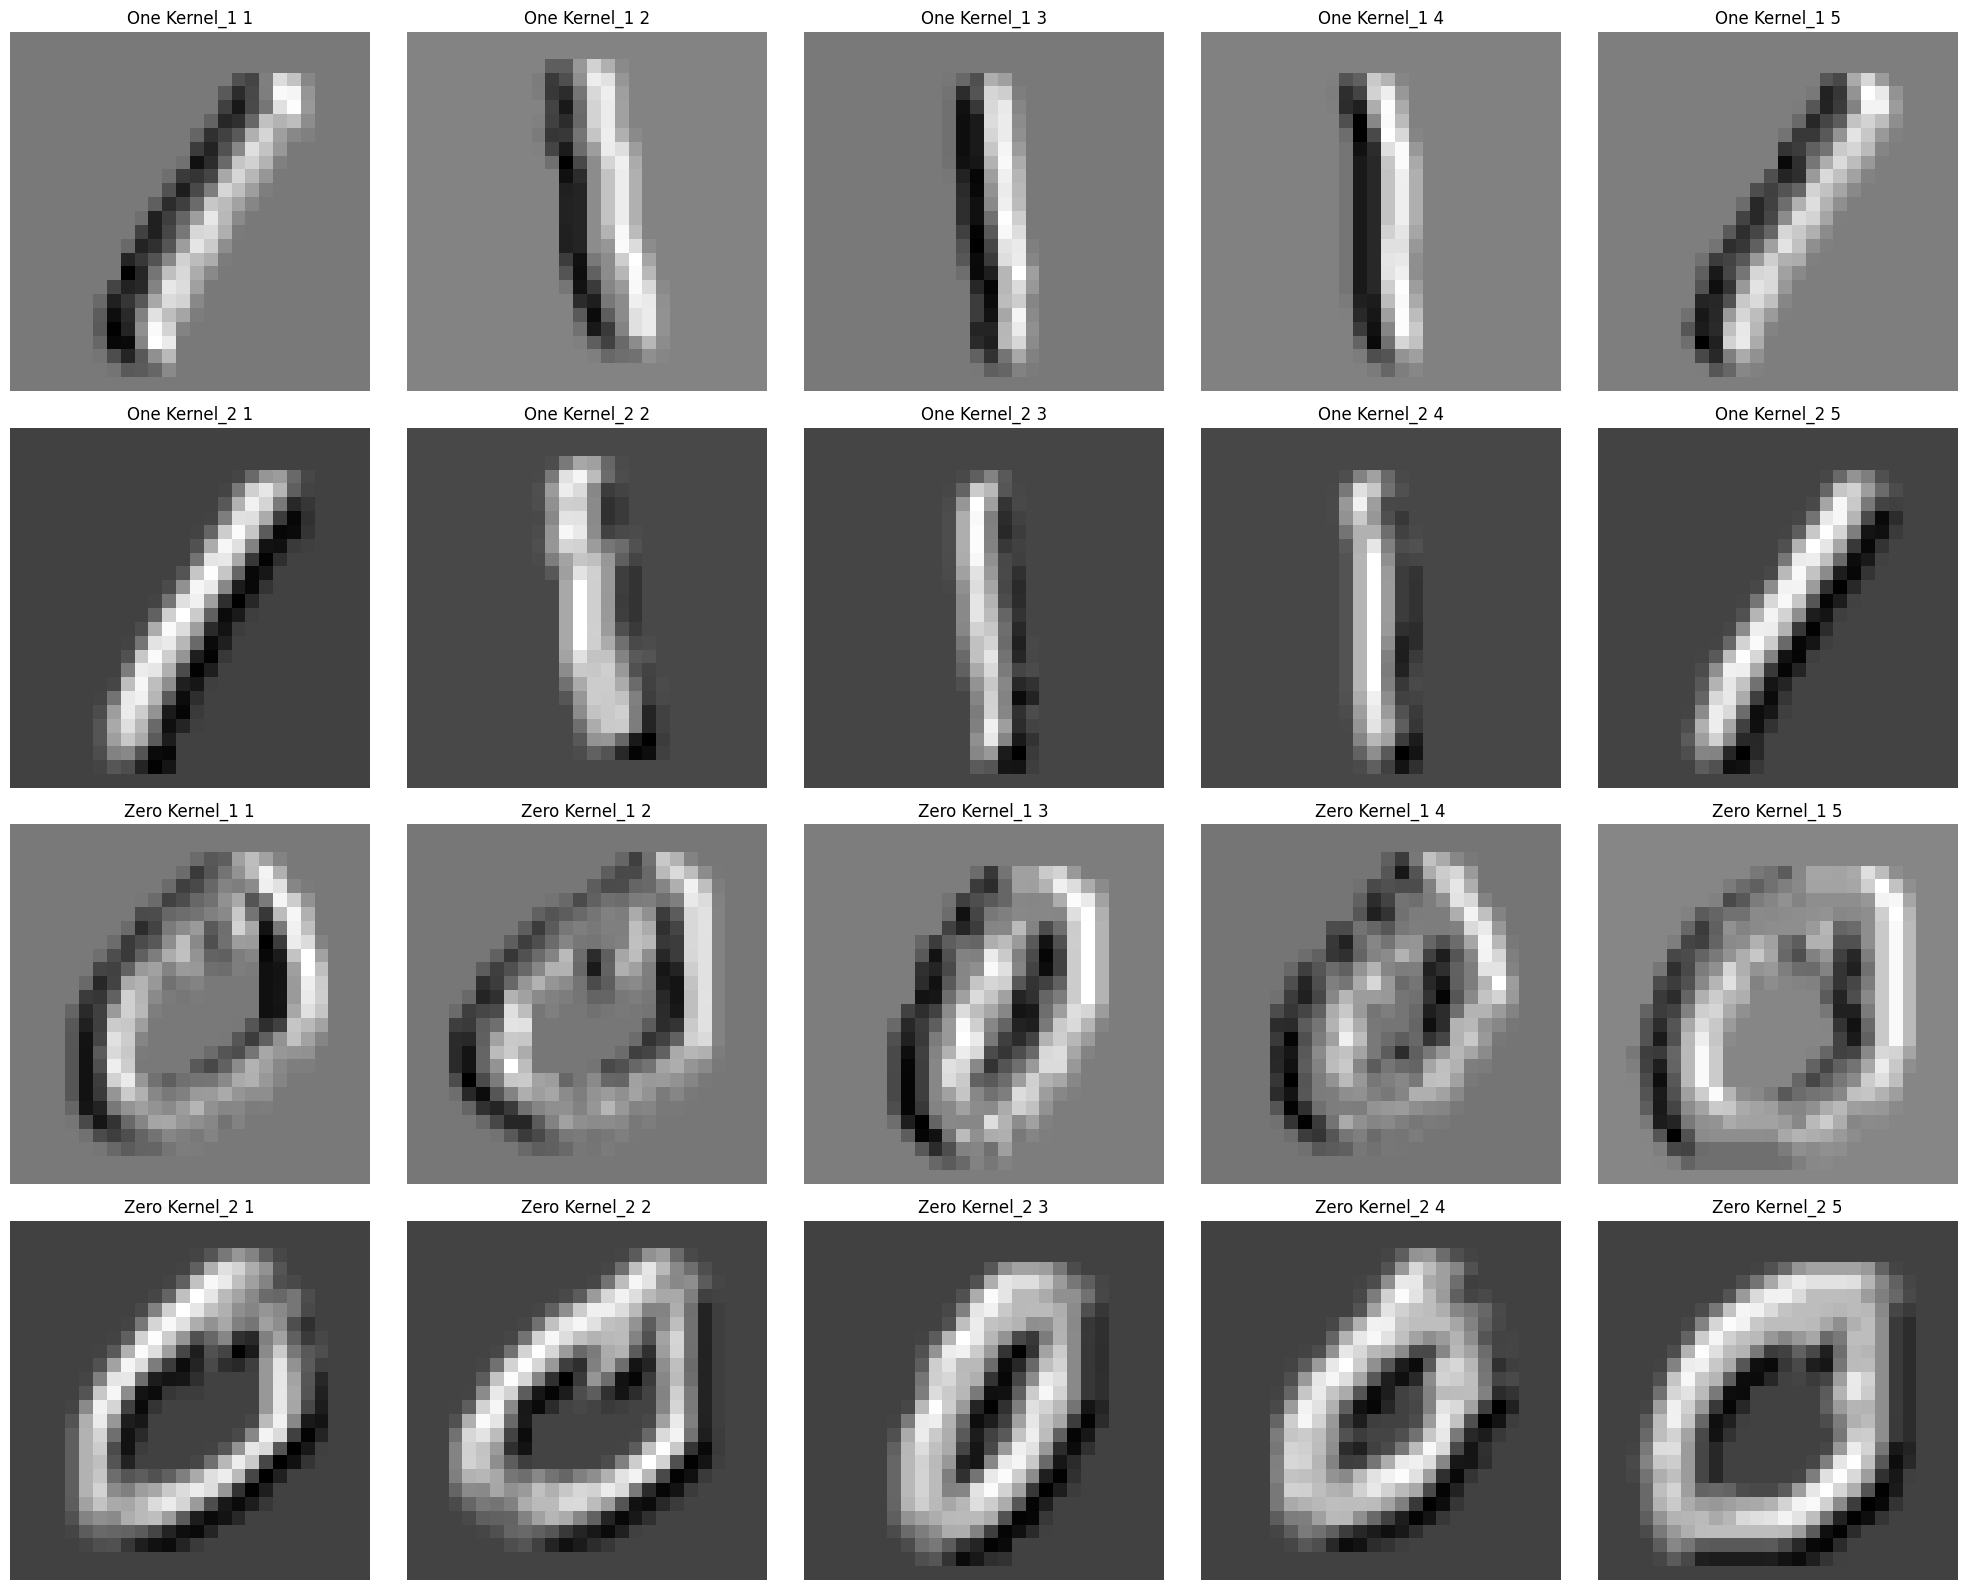

In [9]:
plt.figure(figsize=(20, 16))

# Plot images of digit '1'
for i, (a, b) in enumerate(conv_results['ones']):
    plt.subplot(4, 5, i + 1)
    plt.imshow(a, cmap='gray')
    plt.title(f'One Kernel_1 {i+1}')
    plt.axis('off')
    
    plt.subplot(4, 5, 5 + i + 1)
    plt.imshow(b, cmap='gray')
    plt.title(f'One Kernel_2 {i+1}')
    plt.axis('off')

# Plot images of digit '0'
for i, (a, b) in enumerate(conv_results['zeros']):
    plt.subplot(4, 5, 10 + i + 1)
    plt.imshow(a, cmap='gray')
    plt.title(f'Zero Kernel_1 {i+1}')
    plt.axis('off')
    
    plt.subplot(4, 5, 15 + i + 1)
    plt.imshow(b, cmap='gray')
    plt.title(f'Zero Kernel_2 {i+1}')
    plt.axis('off')

plt.tight_layout()
plt.show()

In [10]:
def max_pooling(image, pool_size=2):
    image_height, image_width = len(image), len(image[0])
    pool_height, pool_width = pool_size, pool_size
    
    output_height = image_height // pool_height
    output_width = image_width // pool_width
    
    output = [[0 for _ in range(output_width)] for _ in range(output_height)]
    
    for i in range(output_height):
        for j in range(output_width):
            # Define the window
            window = [image[i * pool_height + m][j * pool_width + n] 
                      for m in range(pool_height) for n in range(pool_width)]
            # Find the maximum value in the window
            output[i][j] = max(window)
            
    return output


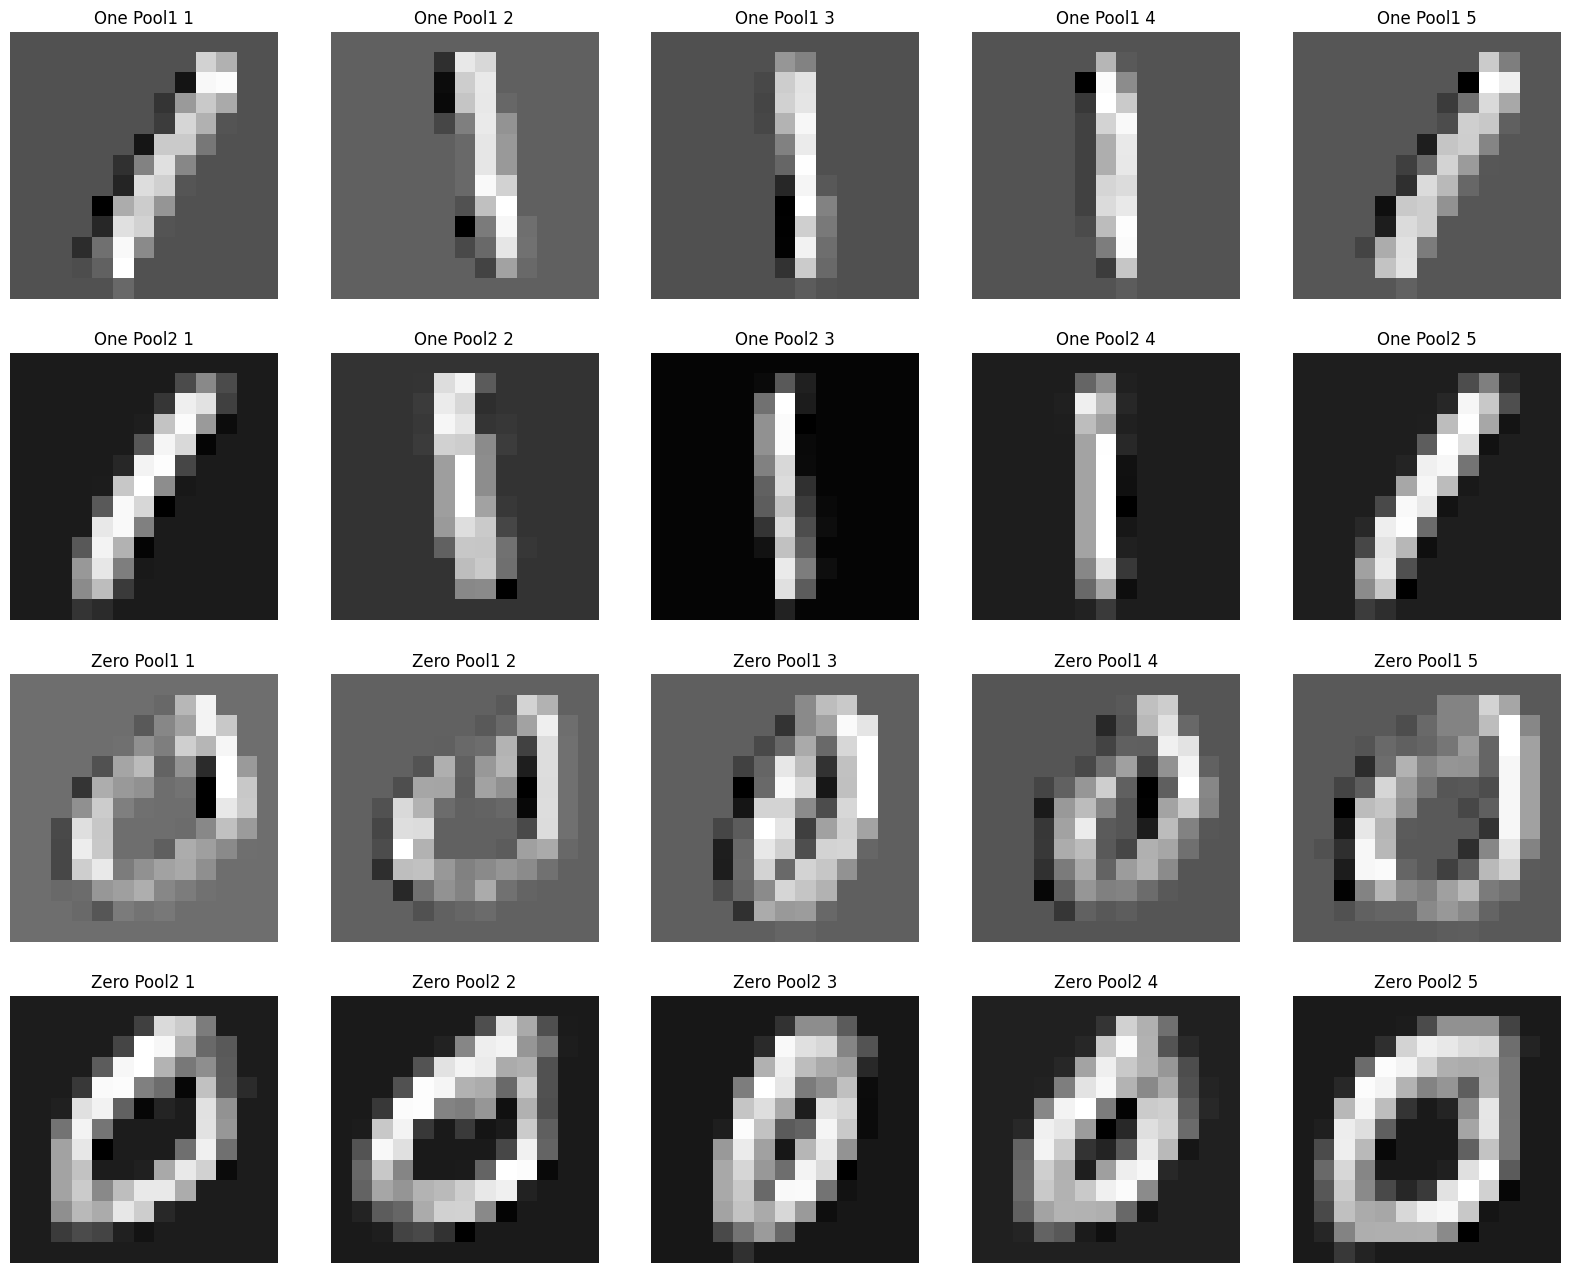

In [11]:
pool_size = 2
pooled_results = {'ones': [], 'zeros': []}

for conv1, conv2 in conv_results['ones']:
    pooled1 = max_pooling(conv1, pool_size)
    pooled2 = max_pooling(conv2, pool_size)
    pooled_results['ones'].append((pooled1, pooled2))

for conv1, conv2 in conv_results['zeros']:
    pooled1 = max_pooling(conv1, pool_size)
    pooled2 = max_pooling(conv2, pool_size)
    pooled_results['zeros'].append((pooled1, pooled2))


plt.figure(figsize=(20, 16))
# Plot images of digit '1'
for i, (pooled1, pooled2) in enumerate(pooled_results['ones']):
    plt.subplot(4, 5, i + 1)
    plt.imshow(pooled1, cmap='gray')
    plt.title(f'One Pool1 {i+1}')
    plt.axis('off')
    
    plt.subplot(4, 5, 5 + i + 1)
    plt.imshow(pooled2, cmap='gray')
    plt.title(f'One Pool2 {i+1}')
    plt.axis('off')

# Plot images of digit '0'
for i, (pooled1, pooled2) in enumerate(pooled_results['zeros']):
    plt.subplot(4, 5, 10 + i + 1)
    plt.imshow(pooled1, cmap='gray')
    plt.title(f'Zero Pool1 {i+1}')
    plt.axis('off')
    
    plt.subplot(4, 5, 15 + i + 1)
    plt.imshow(pooled2, cmap='gray')
    plt.title(f'Zero Pool2 {i+1}')
    plt.axis('off')

#plt.tight_layout()
plt.show()

In [12]:
(pooled_results['ones'][0][0][1][-3])

0.10341965247058824

In [13]:
def flatten(image):
    return np.array(image).flatten()

In [14]:
a=[[1,2,3],[4,5,6]]
b=[[9,8,7],[6,5,4]]
a=a+b
print(a,b)
x=flatten(a)
print(x)

[[1, 2, 3], [4, 5, 6], [9, 8, 7], [6, 5, 4]] [[9, 8, 7], [6, 5, 4]]
[1 2 3 4 5 6 9 8 7 6 5 4]


In [15]:
# Flatten the pooled feature maps
flattened_results = {'ones': [], 'zeros': []}

for pooled1, pooled2 in pooled_results['ones']:
    flattened = flatten(pooled1+pooled2)
    flattened_results['ones'].append((flattened))

for pooled1, pooled2 in pooled_results['zeros']:
    flattened = flatten(pooled1+pooled2)
    flattened_results['zeros'].append((flattened))



In [16]:
len(flattened_results['ones'][0])
print((flattened_results['ones'][0]).reshape(1,-1).shape)
# q=np.array([1,2,3,4,5,6,7,8,9]).reshape(1,-1).shape
# print(q)

(1, 338)


Sizes of flattened feature maps for digit '1':
One 1 - Flattened Conv1: (338,)
One 2 - Flattened Conv1: (338,)
One 3 - Flattened Conv1: (338,)
One 4 - Flattened Conv1: (338,)
One 5 - Flattened Conv1: (338,)

Sizes of flattened feature maps for digit '0':
Zero 1 - Flattened Conv1: (338,)
Zero 2 - Flattened Conv1: (338,)
Zero 3 - Flattened Conv1: (338,)
Zero 4 - Flattened Conv1: (338,)
Zero 5 - Flattened Conv1: (338,)


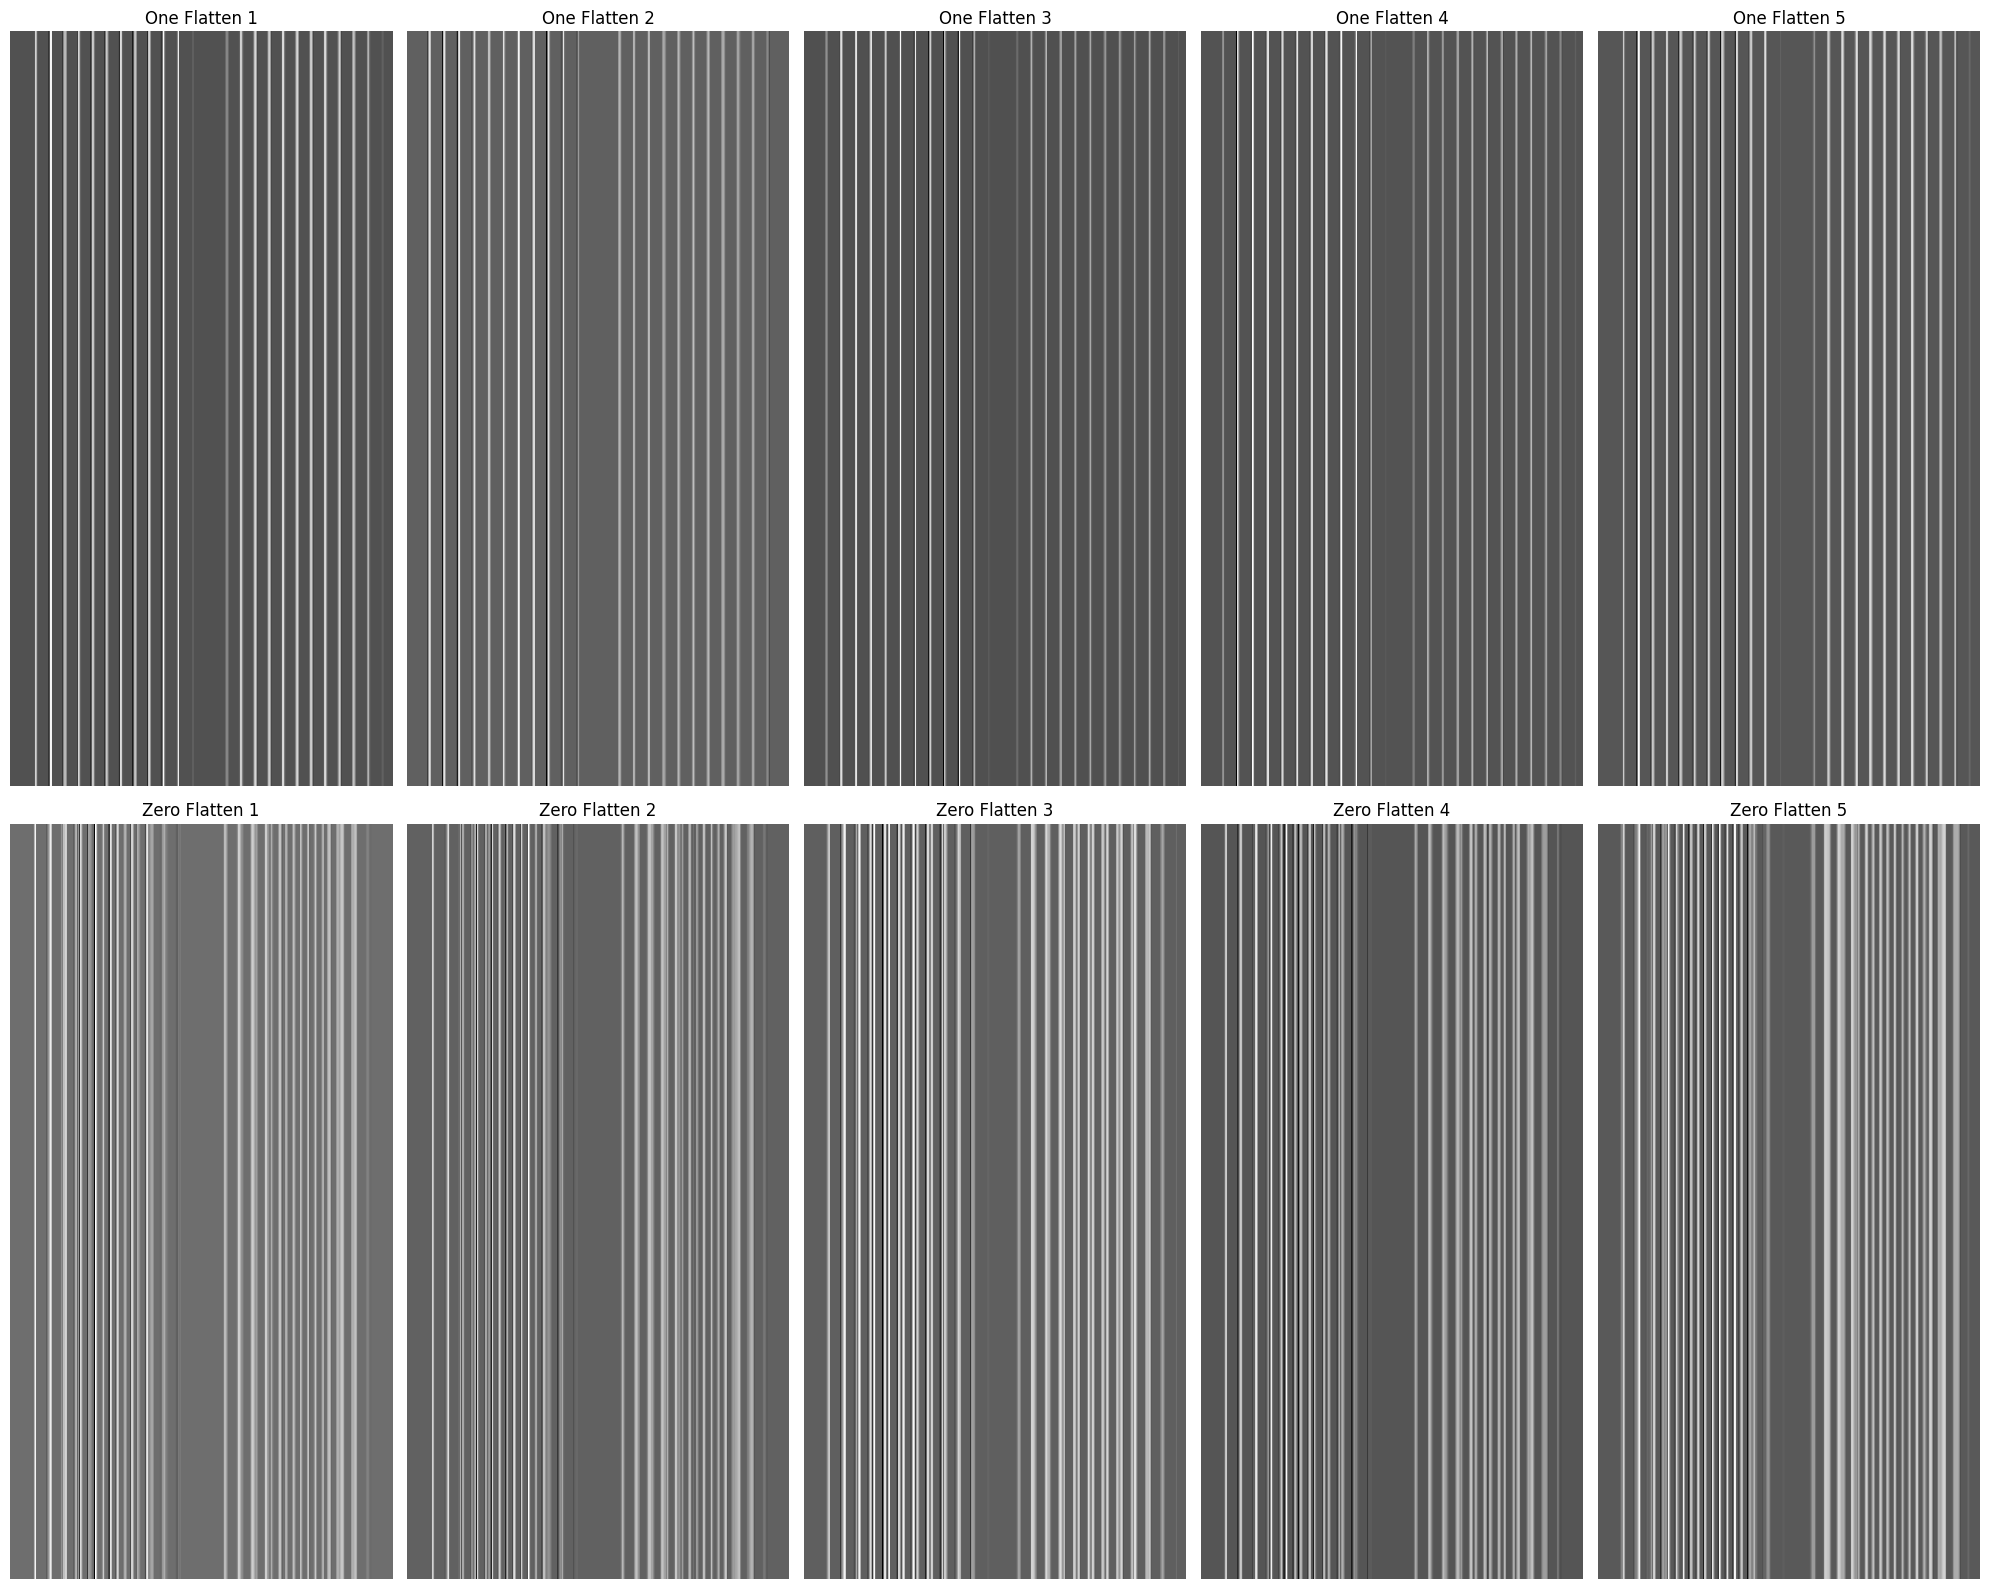

In [ ]:
# Print sizes of flattened feature maps
print("Sizes of flattened feature maps for digit '1':")
for i, (flattened1) in enumerate(flattened_results['ones']):
    print(f"One {i+1} - Flattened Conv1: {flattened1.shape}")

print("\nSizes of flattened feature maps for digit '0':")
for i, (flattened1) in enumerate(flattened_results['zeros']):
    print(f"Zero {i+1} - Flattened Conv1: {flattened1.shape}")



plt.figure(figsize=(20, 16))
plt.imshow(flattened_results['ones'][0].reshape(1, -1), cmap='gray', aspect='auto')
plt.title(f'One Flatten {i+1}')
plt.axis('off')


# #Plot flattened feature maps for digit '1'
# for i, (flattened1) in enumerate(flattened_results['ones']):
#     plt.subplot(2, 5, i + 1)
#     plt.imshow(flattened1.reshape(1, -1), cmap='gray', aspect='auto')
#     plt.title(f'One Flatten {i+1}')
#     plt.axis('off')


# # Plot flattened feature maps for digit '0'
# for i, (flattened1) in enumerate(flattened_results['zeros']):
#     plt.subplot(2, 5, 5 + i + 1)
#     plt.imshow(flattened1.reshape(1, -1), cmap='gray', aspect='auto')
#     plt.title(f'Zero Flatten {i+1}')
#     plt.axis('off')


plt.tight_layout()
plt.show()

In [18]:
def relu(x):
    return np.maximum(0, x)

In [19]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [20]:
def softmax(x):
    e_x = np.exp(x - np.max(x)) 
    return e_x / e_x.sum(axis=0, keepdims=True)

In [21]:
def dense_layer(inputs, weights, biases, activation_function=None):
    output = np.dot(inputs, weights) + biases
    if activation_function:
        output = activation_function(output)
    return output

In [22]:
input_size = (len(flattened_results['ones'][0])) 
output_size  = 1
print(input_size)

338


In [23]:
# Randomly initialize weights and biases
np.random.seed(0)  
weights1 = np.random.randn(input_size, output_size)
biases1 = np.random.randn(output_size)

In [24]:
# Apply the dense layer to each flattened feature map
dense1_results = {'ones': [], 'zeros': []}

for flattened in flattened_results['ones']:
    # Apply dense layer with no activation function
    dense_output = dense_layer(flattened, weights1, biases1, sigmoid)
    dense1_results['ones'].append((dense_output))

for flattened in flattened_results['zeros']:
    # Apply dense layer with no activation function
    dense_output = dense_layer(flattened, weights1, biases1, sigmoid)
    dense1_results['zeros'].append((dense_output))


In [25]:
len(dense1_results['zeros'][0])

1

Sizes of dense layer outputs for digit '1':
One 1 - Dense Output1: (1,)
One 2 - Dense Output1: (1,)
One 3 - Dense Output1: (1,)
One 4 - Dense Output1: (1,)
One 5 - Dense Output1: (1,)

Sizes of dense layer outputs for digit '0':
Zero 1 - Dense Output1: (1,)
Zero 2 - Dense Output1: (1,)
Zero 3 - Dense Output1: (1,)
Zero 4 - Dense Output1: (1,)
Zero 5 - Dense Output1: (1,)


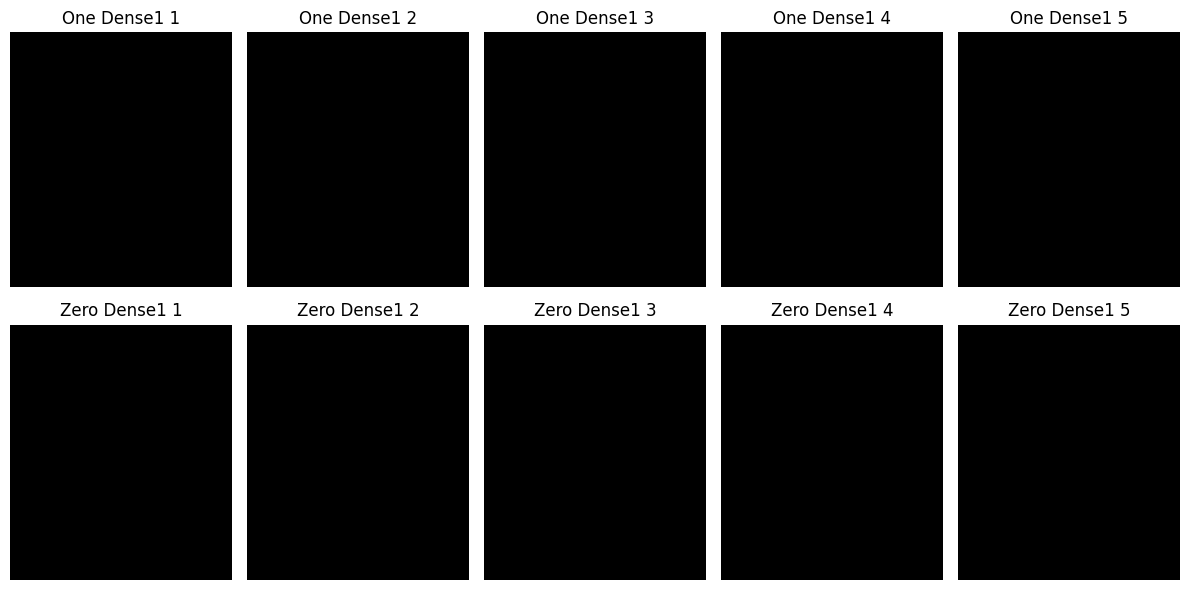

In [26]:
# Print sizes of dense layer outputs
print("Sizes of dense layer outputs for digit '1':")
for i, (dense1) in enumerate(dense1_results['ones']):
    print(f"One {i+1} - Dense Output1: {dense1.shape}")

print("\nSizes of dense layer outputs for digit '0':")
for i, (dense1) in enumerate(dense1_results['zeros']):
    print(f"Zero {i+1} - Dense Output1: {dense1.shape}")

# Plot the dense layer outputs
plt.figure(figsize=(12, 6))

# Plot dense outputs for digit '1'
for i, (dense1) in enumerate(dense1_results['ones']):
    plt.subplot(2, 5, i + 1)
    plt.imshow(dense1.reshape(1, -1), cmap='gray', aspect='auto')
    plt.title(f'One Dense1 {i+1}')
    plt.axis('off')


# Plot dense outputs for digit '0'
for i, (dense1) in enumerate(dense1_results['zeros']):
    plt.subplot(2, 5, 5 + i + 1)
    plt.imshow(dense1.reshape(1, -1), cmap='gray', aspect='auto')
    plt.title(f'Zero Dense1 {i+1}')
    plt.axis('off')

 
plt.tight_layout()
plt.show()

In [27]:

print(dense1_results['zeros'])
print(dense1_results['ones'])

[array([0.21914859]), array([0.21979606]), array([0.37507547]), array([0.33954311]), array([0.13406035])]
[array([0.55387122]), array([0.12366192]), array([0.17358696]), array([0.51886974]), array([0.54250287])]


In [28]:
# Given data
predictions_zeros = dense1_results['zeros']
predictions_ones = dense1_results['ones']

# True values
true_zeros = 0
true_ones = 1

# Calculate binary cross-entropy loss
def binary_cross_entropy(predictions, true_value):
    predictions = np.array(predictions)
    if true_value == 1:
        loss = -np.mean(np.log(predictions))
    else:
        loss = -np.mean(np.log(1 - predictions))
    return loss

# Create a dictionary for the losses
loss = {
    'zeros': binary_cross_entropy(predictions_zeros, true_zeros),
    'ones': binary_cross_entropy(predictions_ones, true_ones)
}

print("Loss dictionary:", loss)

Loss dictionary: {'zeros': 0.3048916420239209, 'ones': 1.1399535873033362}


weight updation

In [29]:
temp=dense1_results['zeros'][0].shape[0]
print(temp)

1


In [30]:

weights_dense = np.random.randn(temp, 13)  
biases_dense = np.random.randn(13)

dense2_results = {'ones': [], 'zeros': []}


for x in dense1_results['ones']:
    # Apply dense layer with no activation function
    dense2_output1 = dense_layer(x, weights_dense, biases_dense, sigmoid)
    dense2_results['ones'].append((dense2_output1))

for x in dense1_results['zeros']:
    # Apply dense layer with no activation function
    dense2_output2 = dense_layer(x, weights_dense, biases_dense, sigmoid)
    dense2_results['zeros'].append((dense2_output2))




In [31]:
len(dense2_results['zeros'][0])

13

Sizes of dense layer outputs for digit '1':
One 1 - Dense Output1: (13,)
One 2 - Dense Output1: (13,)
One 3 - Dense Output1: (13,)
One 4 - Dense Output1: (13,)
One 5 - Dense Output1: (13,)

Sizes of dense layer outputs for digit '0':
Zero 1 - Dense Output1: (13,)
Zero 2 - Dense Output1: (13,)
Zero 3 - Dense Output1: (13,)
Zero 4 - Dense Output1: (13,)
Zero 5 - Dense Output1: (13,)


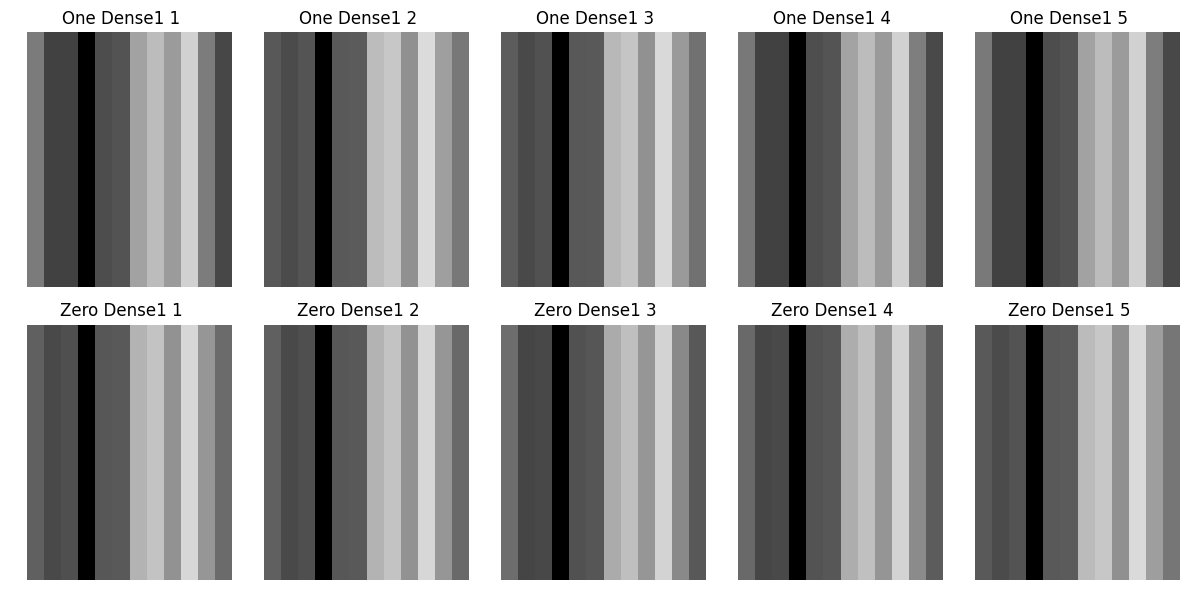

In [32]:
# Print sizes of dense layer outputs
print("Sizes of dense layer outputs for digit '1':")
for i, (dense1) in enumerate(dense2_results['ones']):
    print(f"One {i+1} - Dense Output1: {dense1.shape}")

print("\nSizes of dense layer outputs for digit '0':")
for i, (dense1) in enumerate(dense2_results['zeros']):
    print(f"Zero {i+1} - Dense Output1: {dense1.shape}")

# Plot the dense layer outputs
plt.figure(figsize=(12, 6))

# Plot dense outputs for digit '1'
for i, (dense1) in enumerate(dense2_results['ones']):
    plt.subplot(2, 5, i + 1)
    plt.imshow(dense1.reshape(1, -1), cmap='gray', aspect='auto')
    plt.title(f'One Dense1 {i+1}')
    plt.axis('off')


# Plot dense outputs for digit '0'
for i, (dense1) in enumerate(dense2_results['zeros']):
    plt.subplot(2, 5, 5 + i + 1)
    plt.imshow(dense1.reshape(1, -1), cmap='gray', aspect='auto')
    plt.title(f'Zero Dense1 {i+1}')
    plt.axis('off')

 
plt.tight_layout()
plt.show()

In [33]:
temp=dense2_results['zeros'][0].shape[0]
print(temp)

13


In [34]:

weights_dense = np.random.randn(temp, 1)  
biases_dense = np.random.randn(1)

results = {'ones': [], 'zeros': []}


for x in dense2_results['ones']:
    # Apply dense layer with no activation function
    output1 = dense_layer(x, weights_dense, biases_dense, sigmoid)
    results['ones'].append((output1))

for x in dense2_results['zeros']:
    # Apply dense layer with no activation function
    output2 = dense_layer(x, weights_dense, biases_dense, sigmoid)
    results['zeros'].append((output2))




In [35]:
print(results['ones'])
print(results['zeros'])

[array([0.47099714]), array([0.40988479]), array([0.41770841]), array([0.46664498]), array([0.46959718])]
[array([0.42471177]), array([0.42481028]), array([0.44751025]), array([0.44248921]), array([0.41152631])]


Sizes of dense layer outputs for digit '1':
One 1 - Dense Output1: (1,)
One 2 - Dense Output1: (1,)
One 3 - Dense Output1: (1,)
One 4 - Dense Output1: (1,)
One 5 - Dense Output1: (1,)

Sizes of dense layer outputs for digit '0':
Zero 1 - Dense Output1: (1,)
Zero 2 - Dense Output1: (1,)
Zero 3 - Dense Output1: (1,)
Zero 4 - Dense Output1: (1,)
Zero 5 - Dense Output1: (1,)


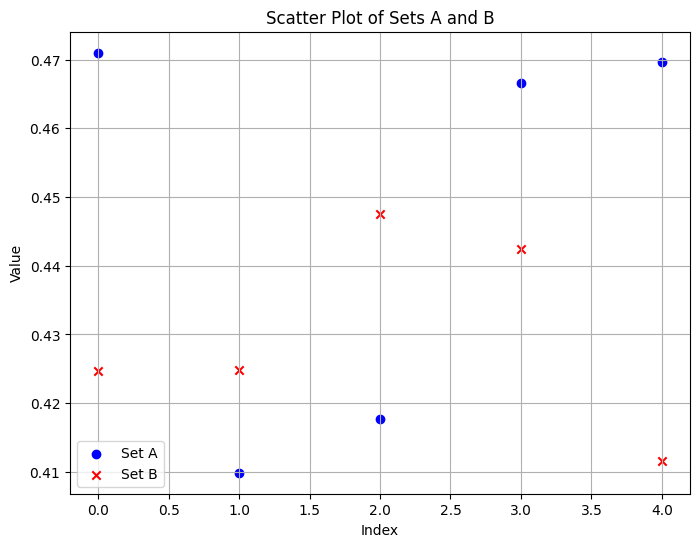

In [36]:
# Print sizes of dense layer outputs
print("Sizes of dense layer outputs for digit '1':")
for i, (dense1) in enumerate(results['ones']):
    print(f"One {i+1} - Dense Output1: {dense1.shape}")

print("\nSizes of dense layer outputs for digit '0':")
for i, (dense1) in enumerate(results['zeros']):
    print(f"Zero {i+1} - Dense Output1: {dense1.shape}")

# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(range(len(results['ones'])), results['ones'], color='blue', marker='o', label='Set A')
plt.scatter(range(len(results['zeros'])), results['zeros'], color='red', marker='x', label='Set B')

# Adding labels and title
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Scatter Plot of Sets A and B')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

In [37]:
def compute_gradients(inputs, weights, biases, output, target):
    # Ensure inputs is a row vector
    inputs = inputs.reshape(1, -1)  # Shape (1, 13)
    # Compute the error
    error = output - target  # Shape (1, 13)
    # Compute gradients
    grad_weights = np.dot(inputs.T, error)  # Shape (13, 13)
    grad_biases = np.sum(error, axis=0)  # Shape (13,)
    return grad_weights, grad_biases


In [38]:
def update_weights(weights, biases, grad_weights, grad_biases, learning_rate):
    weights -= learning_rate * grad_weights
    biases -= learning_rate * grad_biases
    return weights, biases

In [39]:
learning_rate = 0.01
epochs = 100

labels = {'ones': np.array([[1]]), 'zeros': np.array([[0]])}

In [40]:
for epoch in range(epochs):
    for category in ['ones', 'zeros']:
        for dense_output1, dense_output2 in dense_results[category]:
            # Forward pass
            softmax_output1 = softmax(dense_output1)
            softmax_output2 = softmax(dense_output2)
            combined_output = (softmax_output1 + softmax_output2) / 2

            # Compute loss
            loss = cross_entropy_loss(labels[category], combined_output)

            # Backpropagation
            grad_weights, grad_biases = compute_gradients(dense_output1, weights_dense, biases_dense, combined_output, labels[category])
            weights_dense, biases_dense = update_weights(weights_dense, biases_dense, grad_weights, grad_biases, learning_rate)

            # Print loss for every 10 epochs
            if epoch % 10 == 0 and category == 'ones' and dense_output1 is dense_results['ones'][0][0]:
                print(f'Epoch {epoch + 1}/{epochs}, Loss: {loss:.4f}')


NameError: name 'dense_results' is not defined